In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

Importando Data Set

In [84]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Modelo

In [85]:
X = df.drop('Drug', axis=1)
y = df['Drug']

le = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(y)

X

,Age,Sex,BP,Cholesterol,Na_to_K
0,8,0,0,0,167
1,30,1,1,0,89
2,30,1,1,0,43
3,12,0,2,0,10
4,44,0,1,0,133
...,...,...,...,...,...
195,39,0,1,0,69
196,1,1,1,0,75
197,35,1,2,0,36
198,8,1,2,1,102


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [87]:
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test) 

# df_train = pd.DataFrame(X_train,index=X_train[:,0])

Árvore de Decisão

In [88]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = dt.predict(X_test)

In [90]:
print("Relatório de classificação: \n", classification_report(y_test, y_pred)) 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Matriz de Confusão

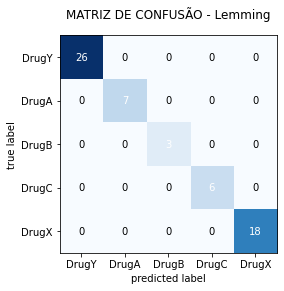

In [91]:
c_matriz = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=c_matriz)
plt.title('MATRIZ DE CONFUSÃO - Lemming')

ticks = ['DrugY', 'DrugA', 'DrugB', 'DrugC', 'DrugX']
n_ticks = [0, 1, 2, 3, 4]
ax.set_xticks(n_ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(n_ticks)
ax.set_yticklabels(ticks)

plt.savefig('MatrizConfusão.png', format='png')
plt.show()

Plot Árvore de Decisão

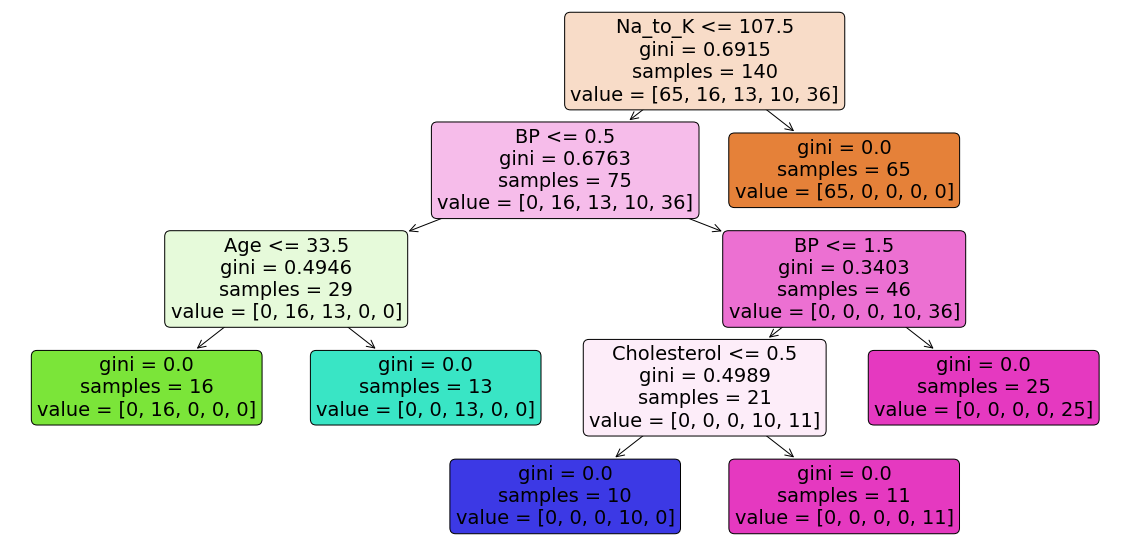

In [92]:
plt.figure(figsize = (20,10))
decision_tree = plot_tree(decision_tree=dt, feature_names = df.columns, filled = True , precision = 4, rounded = True)